In [1]:
import geopandas as gpd
import shapely
from shapely.geometry.polygon import Polygon

def create_hectar_sized_square(lat, lon):
    gdf = gpd.GeoDataFrame(geometry=[shapely.geometry.Point(lon, lat)])
    gdf.crs = {'init': 'epsg:4326'}
    gdf = gdf.to_crs({'init': 'epsg:3857'})
    gdf['geometry'] = gdf['geometry'].apply(lambda x: x.buffer(100).envelope) # looking for 2 hectare. 1 hectare = 10000 sq meter ... sq root of 10,000 is 100
    print(gdf.area)
    gdf = gdf.to_crs({'init': 'epsg:4326'})
    gdf.plot()
    return gdf.to_json()

0    40000.0
dtype: float64


'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[-122.2593983152841, 37.87119087974465], [-122.25760168471588, 37.87119087974465], [-122.25760168471588, 37.87260911343006], [-122.2593983152841, 37.87260911343006], [-122.2593983152841, 37.87119087974465]]]}}]}'

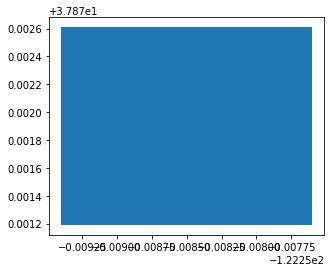

In [2]:
create_hectar_sized_square(37.8719, -122.2585)